In [1]:
import os
import numpy as np

from tqdm.notebook import tqdm
from sklearn.metrics import auc

from tensorflow.keras.datasets.mnist import load_data

import matplotlib.pyplot as plt

In [2]:
(_, _), (_, y_test) = load_data(path=os.path.expanduser('~/dev/data/mnist/mnist.npz'))

In [3]:
y_pred = np.load('./models/model_01/predictions.npy')

In [4]:
prioritizations = np.load('./results/similarity_prioritization_rmse.npy')

In [72]:
# calculate auc scores for all similarity-based prioritizations

aucs_prioritized = []

for i in tqdm(range(len(prioritizations))):
    prioritization = prioritizations[i]
    
    y_test_sorted = y_test[prioritization]
    y_pred_sorted = y_pred[prioritization]
    
    errors = 0
    cum_errors = []

    for i in range(len(y_test_sorted)):
        if y_test_sorted[i] != y_pred_sorted[i]:
            errors += 1
        cum_errors.append(errors)
        
    auc_prioritized = auc(range(len(y_test_sorted)), cum_errors)
    aucs_prioritized.append(auc_prioritized)

In [5]:
# select the best and the worst similarity-based prioritizations

print(np.argmax(aucs_prioritized))
print(np.argmin(aucs_prioritized))

NameError: name 'aucs_prioritized' is not defined

In [24]:
lsa_sadl = np.load('./tmp/lsa_sadl.npy')
dsa_sadl = np.load('./tmp/dsa_sadl.npy')

In [25]:
lsa_prio = np.argsort(lsa_sadl)[::-1]
dsa_prio = np.argsort(dsa_sadl)[::-1]

In [7]:
ae_bv_prio = np.load('./results/model_01/bottleneck_values_prioritization.npy')
ae_re_prio = np.load('./results/model_01/reconstruction_errors_prioritization.npy')

In [8]:
ae_bv_prio_02 = np.load('./results/model_02/bottleneck_values_prioritization.npy')
ae_re_prio_02 = np.load('./results/model_02/reconstruction_errors_prioritization.npy')

In [9]:
vae_bv_prio = np.load('./results/model_04/bottleneck_values_prioritization.npy')
vae_re_prio = np.load('./results/model_04/reconstruction_errors_prioritization.npy')

In [26]:
cum_errors = []
auc_scores = []

for prioritization in [
                       lsa_prio, dsa_prio,
                       ae_bv_prio, ae_re_prio,
                       ae_bv_prio_02, ae_re_prio_02,
                       vae_bv_prio, vae_re_prio,
                       prioritizations[18],
                       prioritizations[6172][::-1],
                      ]:
    
    y_test_sorted = y_test[prioritization]
    y_pred_sorted = y_pred[prioritization]
    
    errors = 0
    cum_errors_ = []

    for i in range(len(y_test_sorted)):
        if y_test_sorted[i] != y_pred_sorted[i]:
            errors += 1
        cum_errors_.append(errors)
        
    auc_score = auc(range(len(y_test_sorted)), cum_errors_)
    
    cum_errors.append(cum_errors_)
    auc_scores.append(auc_score)

In [27]:
ideal = list(range(errors)) + [errors] * (len(cum_errors_)-errors)
random = [[0,len(cum_errors_)], [0,errors]]

In [28]:
auc_ideal = auc(range(len(y_test_sorted)), ideal)

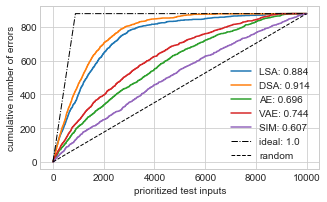

In [29]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(5,3))
    plt.plot(cum_errors[0], label='LSA: '+str(round(auc_scores[0]/auc_ideal,3)))
    plt.plot(cum_errors[1], label='DSA: '+str(round(auc_scores[1]/auc_ideal,3)))
#     plt.plot(cum_errors[2], label='autoencoder (bv): '+str(round(auc_scores[2]/auc_ideal,3)))
    plt.plot(cum_errors[3], label='AE: '+str(round(auc_scores[3]/auc_ideal,3)))
#     plt.plot(cum_errors[4], label='autoencoder_full (bv): '+str(round(auc_scores[4]/auc_ideal,3)))
#     plt.plot(cum_errors[5], label='autoencoder_full (re): '+str(round(auc_scores[5]/auc_ideal,3)))
#     plt.plot(cum_errors[6], label='vae (bv): '+str(round(auc_scores[6]/auc_ideal,3)))
    plt.plot(cum_errors[7], label='VAE: '+str(round(auc_scores[7]/auc_ideal,3)))
    plt.plot(cum_errors[8], label='SIM: '+str(round(auc_scores[8]/auc_ideal,3)))
#     plt.plot(cum_errors[9], label='similarity worst: '+str(round(auc_scores[9]/auc_ideal,3)))
    plt.plot(ideal, '-.', c='k', linewidth=1, label='ideal: '+str(auc_ideal/auc_ideal))
    plt.plot(*random, '--', c='k', linewidth=1, label='random')
    plt.xlabel('prioritized test inputs')
    plt.ylabel('cumulative number of errors')
    plt.legend()
#     plt.savefig(os.path.expanduser('~/Desktop/result.png'), dpi=300, bbox_inches='tight')
    plt.show()